<a href="https://colab.research.google.com/github/amirjhn/MachineLearning2025/blob/main/mini_projects/mini_project_3/mini_project_3_q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PART1

# <font color='#FFE15D'>**Decision Trees 🌵**</font>

## **🔸 Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from graphviz import Digraph

## **🔸 ID3 (from Scratch)**

### Data

In [ ]:
#https://drive.google.com/file/d/1psu-wDvYR3a0dSSs-cIsfoXI7O6CE40z/view?usp=sharing
!gdown 1psu-wDvYR3a0dSSs-cIsfoXI7O6CE40z

Downloading...
From: https://drive.google.com/uc?id=1psu-wDvYR3a0dSSs-cIsfoXI7O6CE40z
To: /content/covid.csv
100% 258/258 [00:00<00:00, 910kB/s]


In [ ]:
data = pd.read_csv('/content/covid.csv')
data

,Fever,Cough,Breathing issues,Infected
0,No,No,No,No
1,Yes,Yes,Yes,Yes
2,Yes,Yes,No,No
3,Yes,No,Yes,Yes
4,Yes,Yes,Yes,Yes
5,No,Yes,No,No
6,Yes,No,Yes,Yes
7,Yes,No,Yes,Yes
8,No,Yes,Yes,Yes
9,Yes,Yes,No,Yes


### Model

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [ ]:
labels = data['Infected']
len(labels), labels.unique(), labels.value_counts()
p = labels.value_counts() / len(labels)
-sum(p * np.log2(p))

0.9852281360342515

In [ ]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

data['Infected'].value_counts()

Yes    8
No     6
Name: Infected, dtype: int64

In [ ]:
 entropy_child = 0
 for value in data['Cough'].unique():
        subset = data[data['Cough'] == value]
        print(subset)
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset['Infected'])
entropy_child

  Fever Cough Breathing issues Infected
0    No    No               No       No
3   Yes    No              Yes      Yes
6   Yes    No              Yes      Yes
7   Yes    No              Yes      Yes
   Fever Cough Breathing issues Infected
1    Yes   Yes              Yes      Yes
2    Yes   Yes               No       No
4    Yes   Yes              Yes      Yes
5     No   Yes               No       No
8     No   Yes              Yes      Yes
9    Yes   Yes               No      Yes
10    No   Yes               No       No
11    No   Yes              Yes      Yes
12    No   Yes              Yes       No
13   Yes   Yes               No       No


0.9460794641311808

In [ ]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

In [ ]:
entropy(data['Infected'])

0.9852281360342515

#### * Information Gain

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [ ]:
target = 'Infected'
entropy_parent = entropy(data[target])
entropy_parent

entropy_child = 0
feature = 'Fever'
for value in data[feature].unique():
    subset = data[data[feature] == value]
    display(subset)
    wi = len(subset) / len(data)
    entropy_child += wi * entropy(subset[target])
information_gain = entropy_parent - entropy_child

print(information_gain)

,Fever,Cough,Breathing issues,Infected
0,No,No,No,No
5,No,Yes,No,No
8,No,Yes,Yes,Yes
10,No,Yes,No,No
11,No,Yes,Yes,Yes
12,No,Yes,Yes,No


,Fever,Cough,Breathing issues,Infected
1,Yes,Yes,Yes,Yes
2,Yes,Yes,No,No
3,Yes,No,Yes,Yes
4,Yes,Yes,Yes,Yes
6,Yes,No,Yes,Yes
7,Yes,No,Yes,Yes
9,Yes,Yes,No,Yes
13,Yes,Yes,No,No


0.12808527889139443


In [ ]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        #display(subset)
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

arg=[information_gain(data, feature, 'Infected') for feature in data.iloc[:, :-1].columns]

In [ ]:
np.argmax(arg)

2

In [ ]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [ ]:
information_gain(data, 'Fever', 'Infected')

0.12808527889139443

In [ ]:
information_gain(data, 'Cough', 'Infected')

0.0391486719030707

In [ ]:
information_gain(data, 'Breathing issues', 'Infected')

0.39603884492804464

In [ ]:
data.iloc[:, :-1].columns

Index(['Fever', 'Cough', 'Breathing issues'], dtype='object')

In [ ]:
[information_gain(data, feature, 'Infected') for feature in data.iloc[:, :-1].columns]

[0.12808527889139443, 0.0391486719030707, 0.39603884492804464]

In [ ]:
np.argmax([information_gain(data, feature, 'Infected') for feature in data.iloc[:, :-1].columns])

2

In [ ]:
class Node:
  def __init__(self, feature=None, label=None):
    self.feature = feature
    self.label = label
    self.children = {}
  def __repr__(self):
    if self.feature is not None:
      return f'DecisionNode(feature="{self.feature}", children={self.children})'
    else:
      return f'LeafNode(label="{self.label}")'


In [ ]:
def make_tree(data, target):
  # leaf node?
  if len(data[target].unique()) == 1:
    return Node(label=data[target].iloc[0])
  features = data.drop(target, axis=1).columns
  if len(features) == 0 or len(data) == 0:
    return Node(label=data[target].mode()[0])
  # calculate information gain
  gains = [information_gain(data, feature, target) for feature in features]
  # greedy search to find best fearure
  max_gains_idx = np.argmax(gains)
  best_features = features[max_gains_idx]
  # make a node
  node = Node(feature=best_features)
  # loop over the best feature
  for value in data[best_features].unique():
    subset = data[data[best_features] == value].drop(best_features, axis=1)
    # display(subset)
    node.children[value] = make_tree(subset, target)
  return node

In [ ]:
tree = make_tree(data, 'Infected')
tree

DecisionNode(feature="Breathing issues", children={'No': DecisionNode(feature="Fever", children={'No': LeafNode(label="No"), 'Yes': DecisionNode(feature="Cough", children={'Yes': LeafNode(label="No")})}), 'Yes': DecisionNode(feature="Fever", children={'Yes': LeafNode(label="Yes"), 'No': DecisionNode(feature="Cough", children={'Yes': LeafNode(label="Yes")})})})

In [ ]:
tree.feature

'Breathing issues'

### Visualization

In [ ]:
def visualize_tree(tree, parent=None, node_id=None):
    if node_id is None:
        node_id = '0'
        g = Digraph(node_attr={'shape': 'record', 'height':'.1'})
        g.node(node_id, label=tree.feature)
    else:
        g = parent
        g.node(node_id, label=tree.feature)
    if len(tree.children) == 0:
        g.node(node_id, label=tree.label)
        return g
    for i, (value, child) in enumerate(tree.children.items()):
        child_id = f'{node_id}_{i+1}'
        visualize_tree(child, g, child_id)
        g.edge(node_id, child_id, label=value)
    return g
g = visualize_tree(tree)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

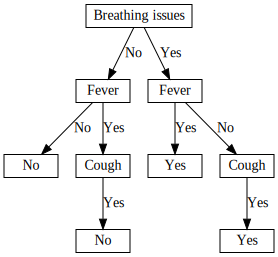

In [ ]:
visualize_tree(tree)

# PART 2

## **🔸 Decision Tree (sklearn)**

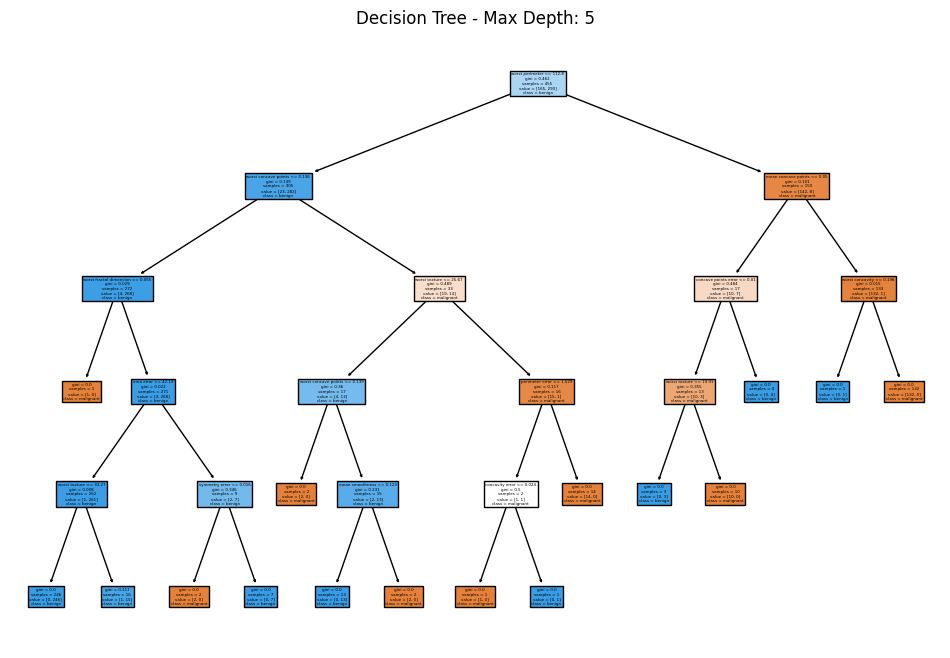

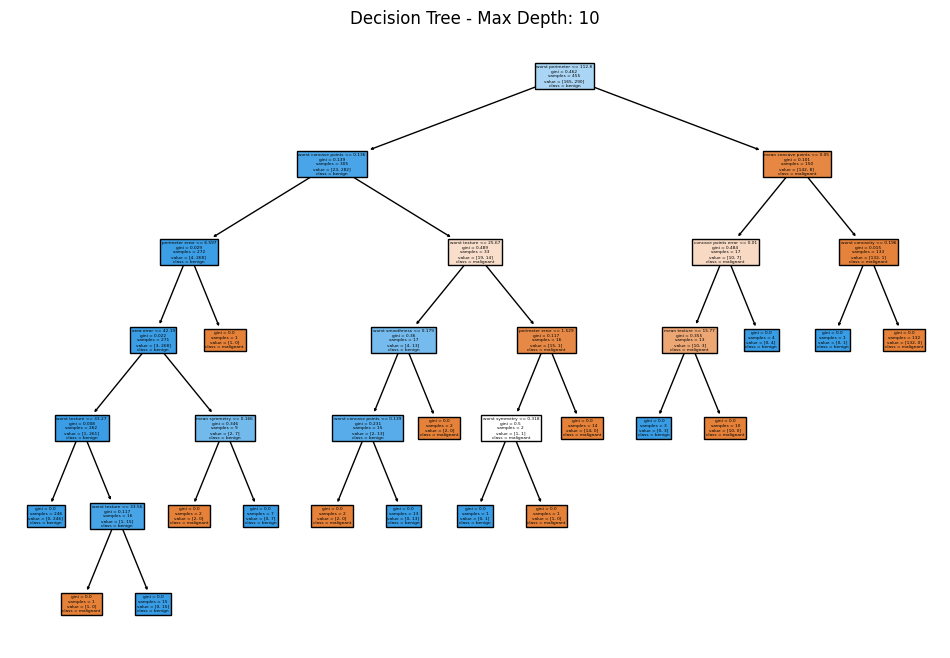

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Create a decision tree classifier
# You can experiment with different hyperparameters, including pruning-related ones
# Example with max_depth as a pruning parameter
max_depth_values = [5 ,10]  # Replace with your desired values
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)

    # Train the model
    clf.fit(X_train, y_train)

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
    plt.title(f'Decision Tree - Max Depth: {max_depth}')
    plt.savefig(f'decision_tree_max_depth_{max_depth}.png')
    plt.show()


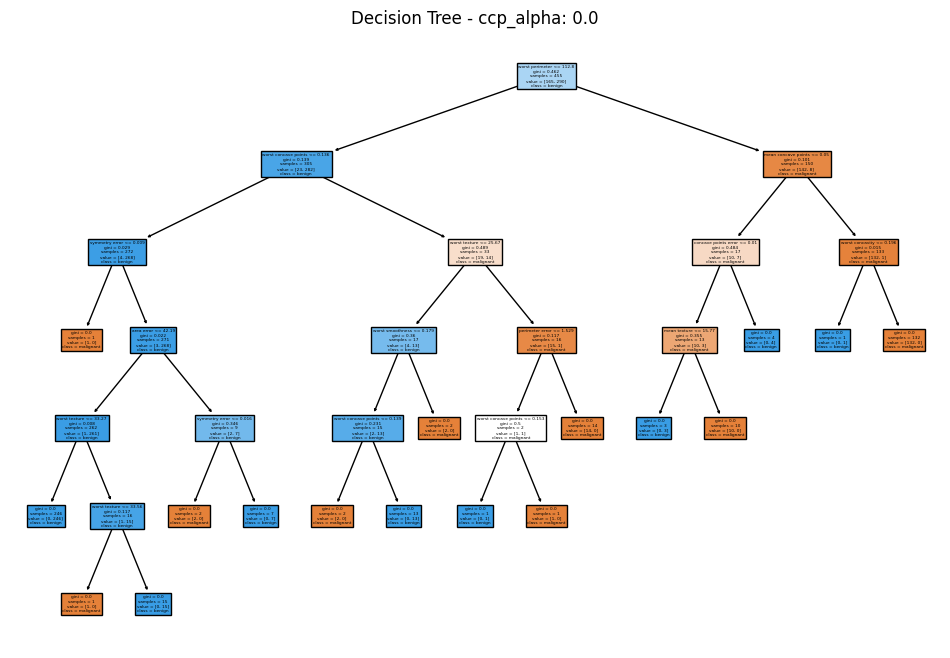

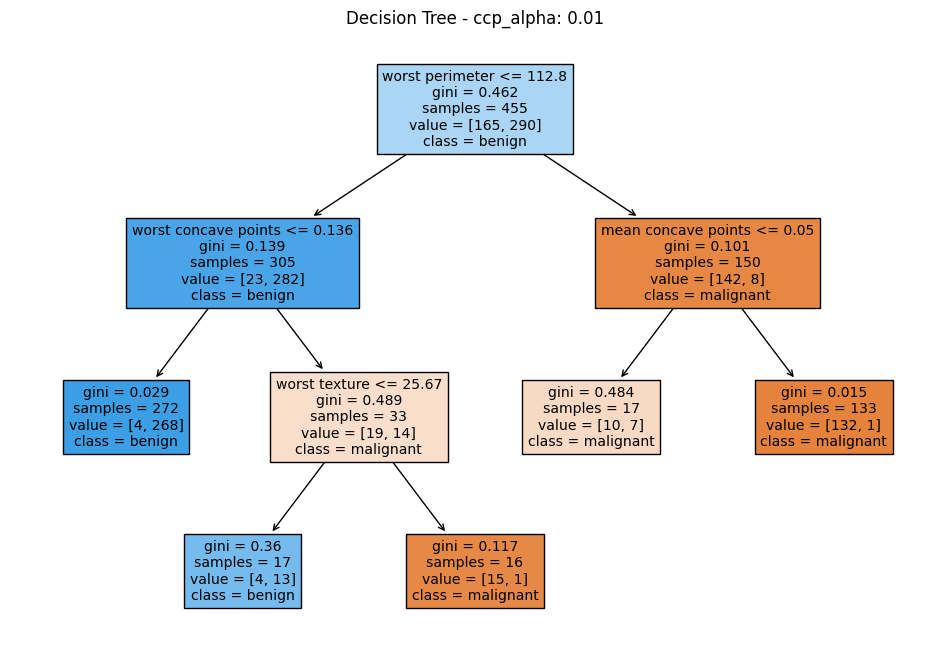

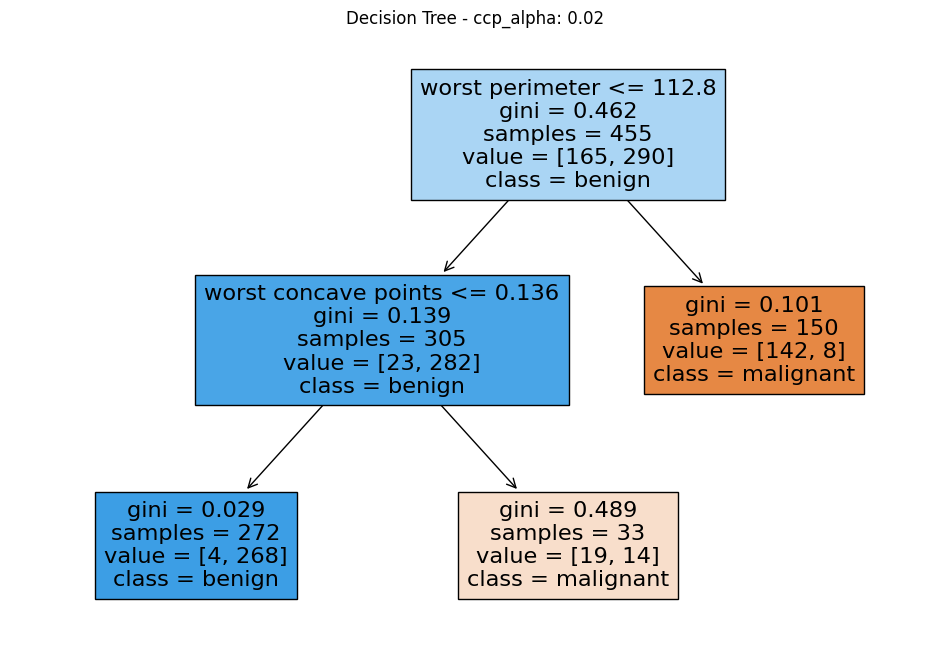

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Create a decision tree classifier
# You can experiment with different hyperparameters, including pruning-related ones
# Example with ccp_alpha as a pruning parameter
ccp_alpha_values = [0.0, 0.01, 0.02]  # Replace with your desired values
for ccp_alpha in ccp_alpha_values:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)

    # Train the model
    clf.fit(X_train, y_train)

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
    plt.title(f'Decision Tree - ccp_alpha: {ccp_alpha}')
    plt.savefig(f'decision_tree_ccp_alpha_{ccp_alpha}.png')
    plt.show()


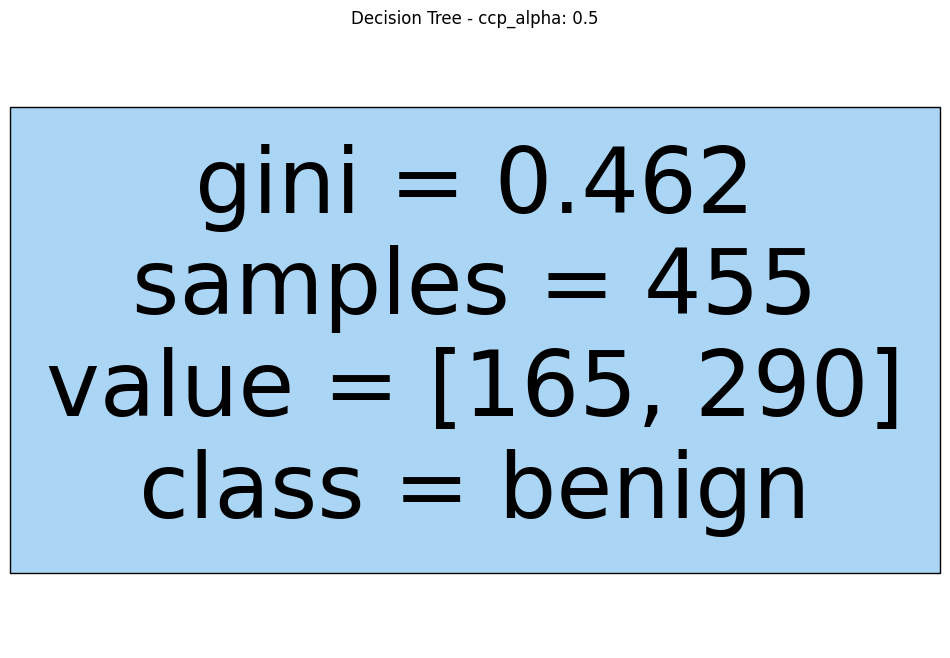

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Create a decision tree classifier
# You can experiment with different hyperparameters, including pruning-related ones
# Example with ccp_alpha as a pruning parameter
ccp_alpha_values = [0.5]  # Replace with your desired values
for ccp_alpha in ccp_alpha_values:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)

    # Train the model
    clf.fit(X_train, y_train)

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
    plt.title(f'Decision Tree - ccp_alpha: {ccp_alpha}')
    plt.savefig(f'decision_tree_ccp_alpha_{ccp_alpha}.png')
    plt.show()

#### * Predict

In [ ]:
    # Analyze two samples from the test set
    sample1 = X_test[0]
    sample2 = X_test[1]

    # Make predictions for the samples
    prediction1 = clf.predict([sample1])[0]
    prediction2 = clf.predict([sample2])[0]

    # Display the results
    print(f"\nAnalysis for Decision Tree with max_depth={max_depth}:\n")

    # Sample 1
    print("Sample 1:")
    print("Features:", sample1)
    print("True Label:", y_test[0])
    print("Predicted Label:", prediction1)
    print("\n")

    # Sample 2
    print("Sample 2:")
    print("Features:", sample2)
    print("True Label:", y_test[1])
    print("Predicted Label:", prediction2)


Analysis for Decision Tree with max_depth=10:

Sample 1:
Features: [1.422e+01 2.312e+01 9.437e+01 6.099e+02 1.075e-01 2.413e-01 1.981e-01
 6.618e-02 2.384e-01 7.542e-02 2.860e-01 2.110e+00 2.112e+00 3.172e+01
 7.970e-03 1.354e-01 1.166e-01 1.666e-02 5.113e-02 1.172e-02 1.574e+01
 3.718e+01 1.064e+02 7.624e+02 1.533e-01 9.327e-01 8.488e-01 1.772e-01
 5.166e-01 1.446e-01]
True Label: 0
Predicted Label: 1


Sample 2:
Features: [1.747e+01 2.468e+01 1.161e+02 9.846e+02 1.049e-01 1.603e-01 2.159e-01
 1.043e-01 1.538e-01 6.365e-02 1.088e+00 1.410e+00 7.337e+00 1.223e+02
 6.174e-03 3.634e-02 4.644e-02 1.569e-02 1.145e-02 5.120e-03 2.314e+01
 3.233e+01 1.553e+02 1.660e+03 1.376e-01 3.830e-01 4.890e-01 1.721e-01
 2.160e-01 9.300e-02]
True Label: 0
Predicted Label: 1


In [ ]:
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Display the results
    print(f"\nAnalysis for Decision Tree with max_depth={max_depth}:\n")
    print("Accuracy:", accuracy)


Analysis for Decision Tree with max_depth=10:

Accuracy: 0.5877192982456141


In [ ]:
# Set max_depth to 5
max_depth = 5

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=max_depth)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

# Display the results
print(f"\nAnalysis for Decision Tree with max_depth={max_depth}:\n")
print("Accuracy:", accuracy)



Analysis for Decision Tree with max_depth=5:

Accuracy: 0.9210526315789473


# PART 3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 13UXkURa_S_QaHNsBO0m1UzbrVH1cakJK

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=13UXkURa_S_QaHNsBO0m1UzbrVH1cakJK
To: /content/Life Expectancy Data.csv
100% 333k/333k [00:00<00:00, 119MB/s]


In [ ]:
data = pd.read_csv('/content/Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Country', 'Status']

label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data = data.dropna()
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# Example: Assuming 'target_column' is your target variable
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']
X,y

(      Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
 0           0  2015       1            263.0             62     0.01   
 1           0  2014       1            271.0             64     0.01   
 2           0  2013       1            268.0             66     0.01   
 3           0  2012       1            272.0             69     0.01   
 4           0  2011       1            275.0             71     0.01   
 ...       ...   ...     ...              ...            ...      ...   
 2933      192  2004       1            723.0             27     4.36   
 2934      192  2003       1            715.0             26     4.06   
 2935      192  2002       1             73.0             25     4.43   
 2936      192  2001       1            686.0             25     1.72   
 2937      192  2000       1            665.0             24     1.68   
 
       percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
 0                  71.279624         65.0     

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1319, 21), (330, 21), (1319,), (330,))